# Fierce Research US Non-Farm Payrolls Analysis

In [345]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark-palette')

import PyDSWS as PyDSWS
ds = PyDSWS.Datastream(username='x', password='x')

df = ds.get_data(tickers='S&PCOMP(RI),USEMPNGME(REL1),US&NFARMO,US&NFARFO',
                  start="2010-01-01",end="0", freq="M")

df.columns= ['s&p_500','nfp_actual','nfp_polls','nfp_smartestimate']

df.tail()

,s&p_500,nfp_actual,nfp_polls,nfp_smartestimate
Date,,,,
2020-04-30,5778.53,2509.0,-8000,-7811.0
2020-05-31,6251.48,4800.0,3000,3585.3
2020-06-30,6383.76,1763.0,1600,1616.6
2020-07-31,6758.20,1371.0,1400,1365.7
2020-08-31,7246.37,NaN,850,897.4


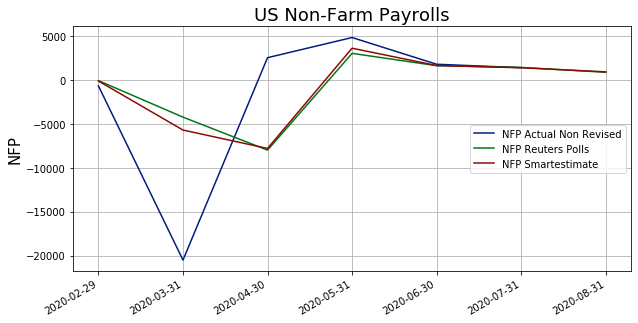

In [346]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.index[-7:],df['nfp_actual'][-7:],label='NFP Actual Non Revised')
plt.plot(df.index[-7:],df['nfp_polls'][-7:],label='NFP Reuters Polls')
plt.plot(df.index[-7:],df['nfp_smartestimate'][-7:],label='NFP Smartestimate')
plt.ylabel('NFP',size=15)
plt.legend(loc=7)
plt.title('US Non-Farm Payrolls',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
fig.autofmt_xdate()
plt.show()

In [347]:
df.isnull().sum()

s&p_500               0
nfp_actual            1
nfp_polls             0
nfp_smartestimate    43
dtype: int64

In [348]:
df.dtypes

s&p_500              float64
nfp_actual           float64
nfp_polls              int64
nfp_smartestimate    float64
dtype: object

In [349]:
df['nfp_actual'] = df['nfp_actual'].shift(1)
df['nfp_polls'] = df['nfp_polls'].shift(1)
df['nfp_smartestimate'] = df['nfp_smartestimate'].shift(1)
df['spreturn']= (((df['s&p_500'].shift(-1)-df['s&p_500'])/df['s&p_500'])*100).round(2)
df['nfp_spread'] = df['nfp_actual']-df['nfp_polls']
df['nfp_smartestimate_spread'] = df['nfp_actual']-df['nfp_smartestimate']

In [350]:
df.tail()

,s&p_500,nfp_actual,nfp_polls,nfp_smartestimate,spreturn,nfp_spread,nfp_smartestimate_spread
Date,,,,,,,
2020-04-30,5778.53,-20500.0,-4250.0,-5717.6,8.18,-16250.0,-14782.4
2020-05-31,6251.48,2509.0,-8000.0,-7811.0,2.12,10509.0,10320.0
2020-06-30,6383.76,4800.0,3000.0,3585.3,5.87,1800.0,1214.7
2020-07-31,6758.20,1763.0,1600.0,1616.6,7.22,163.0,146.4
2020-08-31,7246.37,1371.0,1400.0,1365.7,NaN,-29.0,5.3


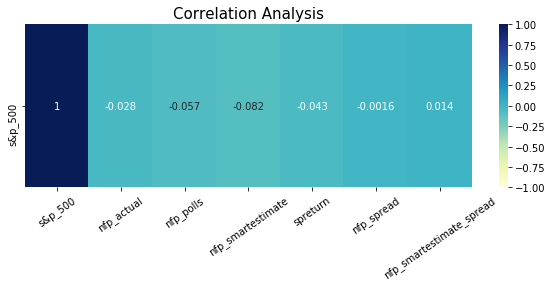

In [351]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
sns.heatmap(df.corr()[:1],vmin=-1,vmax=1,annot=True,cmap="YlGnBu")
plt.xticks(rotation=35)
ax.set_title('Correlation Analysis', size=15);

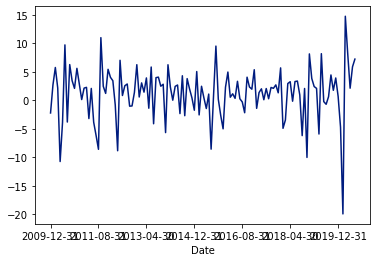

In [352]:
df['spreturn'].plot();

In [353]:
df['posneg'] = [1 if row['nfp_spread']>0 else 0 for idx,row in df.iterrows()]

In [354]:
df.groupby(['posneg']).mean().round(2)

,s&p_500,nfp_actual,nfp_polls,nfp_smartestimate,spreturn,nfp_spread,nfp_smartestimate_spread
posneg,,,,,,,
0,3704.23,-196.36,115.70,72.90,1.29,-312.06,-409.24
1,3955.65,346.41,103.73,114.42,1.07,242.67,321.79


In [355]:
df.groupby(['posneg']).std().round(2)

,s&p_500,nfp_actual,nfp_polls,nfp_smartestimate,spreturn,nfp_spread,nfp_smartestimate_spread
posneg,,,,,,,
0,1424.01,2586.63,582.05,935.22,4.51,2025.41,2273.65
1,1453.80,665.19,1103.67,1357.22,4.65,1322.34,1571.42


Good luck with the market!

Guillaume Girard, CMT 

Fierce Research